# ***Donors Choose Dataset :: Exploratory Data Analysis***

---
### ***`Notebook Contents`***

1. [Problem Statement](#Understand_the_problem)
2. [Importing Libraries](#Libraries_Import)
3. [Reading Data](#Reading_Data)
4. [Data Analysis](#Data_Analysis)


---

### **`Understand_the_problem`**

### **`Libraries_Import`**

In [1]:
import logging
logging.basicConfig(filename="1_Donors_Choose_EDA.log",
                    filemode='w',
                    level=logging.INFO,
                    format="%(asctime)s : %(levelname)s : %(message)s")

try :
    logging.info("#### Packages import ####")
    ## Some basic libaries
    import os
    import sys
    import re          # Tutorial about Python regular expressions: https://pymotw.com/2/re/
    import string
    import shutil
    import warnings
    import pickle
    import sqlite3
    from tqdm import tqdm
    from collections import Counter

    ## Data Pre-processing Libraries
    import numpy as np
    import pandas as pd

    ## Visualization Libraries
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap
    
    ### Visualization :: Seaborn
    import seaborn as sns
    
    ### Visualization :: Plotly
    from chart_studio import plotly
    import plotly.offline as offline
    import plotly.graph_objs as go
    offline.init_notebook_mode()

    ## NLP
    import nltk
    
    ### NLP :: Stopwords
    from nltk.corpus import stopwords

    ### NLP :: Stemmer and Lemmatizer
    from nltk.stem.porter import PorterStemmer
    from nltk.stem import PorterStemmer
    from nltk.stem.wordnet import WordNetLemmatizer

    ### NLP :: Word2Vec
    from gensim.models import Word2Vec
    from gensim.models import KeyedVectors

    ### NLP :: Text Featurization libraries
    from sklearn.feature_extraction.text import TfidfTransformer
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.feature_extraction.text import CountVectorizer

    ## Features Scalers/Standardizers/Normalizers
    from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
    
    ## Cross-Validation and Data Splitting
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import train_test_split
    
    ## ML Algorithms
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
       
    ## Performace Metrics 
    from sklearn import metrics
    from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_score, recall_score
except ImportError as ie:
    # Output expected ImportErrors
    logging.error(msg=ie.__class__.__name__  + " :: Missing Package --> " + ie.name)
except Exception as exception:
    # Output unexpected Exceptions
    logging.info("#### Exceptions other than ModuleImportError ####")
    logging.log(msg=(exception, False))
    logging.log(msg=exception.__class__.__name__ + " :: " + exception.name)
    
%matplotlib inline

In [2]:
## Some display settings
pd.set_option('display.max_rows',105)
pd.set_option('display.max_columns',50)

In [3]:
## Global Variables
lbl_dict = {'family':'Calibri','size':18,'style':'oblique','color':'k'}
ttl_dict = {'family':'Calibri','size':21,'style':'oblique','color':'magenta'}
wdg_dict = {'linewidth': 1, 'edgecolor': 'black'}

### **`Reading_Data`**

In [4]:
dc_train_df = pd.read_csv('Datasets/train_data.csv',index_col=0).reset_index(drop=True)
dc_res_df = pd.read_csv('Datasets/resources.csv')

In [5]:
print("Number of data points in train data", (format(dc_train_df.shape[0],',d'),dc_train_df.shape[1]))
print('-'*50)
print("The attributes of train data :", dc_train_df.columns.values)

Number of data points in train data ('109,248', 16)
--------------------------------------------------
The attributes of train data : ['id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [6]:
dc_train_df.head(4)

id                        teacher_id teacher_prefix school_state  \
0  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.           IN   
1  p258326  897464ce9ddc600bced1151f324dd63a            Mr.           FL   
2  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.           AZ   
3  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.           KY   

  project_submitted_datetime project_grade_category  \
0        2016-12-05 13:43:57          Grades PreK-2   
1        2016-10-25 09:22:10             Grades 6-8   
2        2016-08-31 12:03:56             Grades 6-8   
3        2016-10-06 21:16:17          Grades PreK-2   

            project_subject_categories     project_subject_subcategories  \
0                  Literacy & Language                     ESL, Literacy   
1    History & Civics, Health & Sports  Civics & Government, Team Sports   
2                      Health & Sports    Health & Wellness, Team Sports   
3  Literacy & Language, Math & Science             Literacy, Mathematics   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   
2  The students on the campus come to school know...             NaN   
3  My students live in high poverty conditions wi...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   
3             NaN  My students need to engage in Reading and Math...   

   teacher_number_of_previously_posted_projects  project_is_approved  
0                                             0                    0  
1                                             7                    1  
2                                             1                    0  
3                                             4                    1

In [7]:
print("Number of data points in resource data", (format(dc_res_df.shape[0],',d'),dc_res_df.shape[1]))
print('-'*50)
print("The attributes of resource data :", dc_res_df.columns.values)

Number of data points in resource data ('1,541,272', 4)
--------------------------------------------------
The attributes of resource data : ['id' 'description' 'quantity' 'price']


In [8]:
dc_res_df.head()

id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   
2  p069063  Cory Stories: A Kid's Book About Living With Adhd         1   
3  p069063  Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...         2   
4  p069063  EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...         3   

    price  
0  149.00  
1   14.95  
2    8.45  
3   13.59  
4   24.95

#### **So, the topic related dataset has around 100k records, whereas, resources dataset has around 1.5 million records. This means that there can be multiple resources for a project.**

### **`Data_Analysis`**

#### **Q: How many projects were approved or rejected?**

In [9]:
dc_train_df['project_is_approved'].value_counts()

1    92706
0    16542
Name: project_is_approved, dtype: int64

In [10]:
tot_subms = dc_train_df.shape[0]
tot_apprv_subms = dc_train_df['project_is_approved'].value_counts()[1]
tot_rejec_subms = dc_train_df['project_is_approved'].value_counts()[0]
apprv_percnt = np.divide((1.0*tot_apprv_subms),tot_subms)*100.0
rejec_percnt = np.divide((1.0*tot_rejec_subms),tot_subms)*100.0

In [11]:
print("Number of projects that are approved for funding --> {:.3f}%".format(apprv_percnt))
print("Number of projects that are not approved for funding --> {:.3f}%".format(rejec_percnt))

Number of projects that are approved for funding --> 84.858%
Number of projects that are not approved for funding --> 15.142%


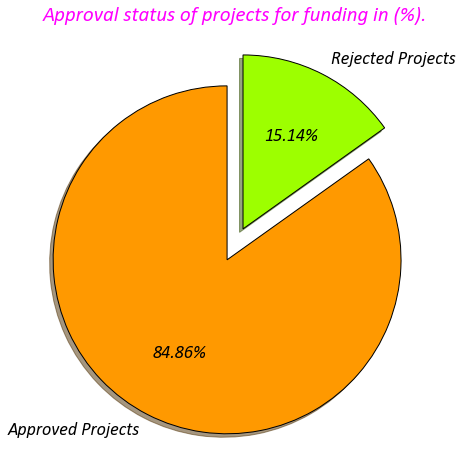

In [12]:
with plt.style.context('seaborn-bright'):
    plt.figure(figsize=(10,8))
    plt.pie(x=[apprv_percnt,rejec_percnt],
            autopct=lambda pct : "{:.2f}%".format(pct),
            colors=sns.color_palette('gist_rainbow'),
            shadow=True,
            labels=['Approved Projects','Rejected Projects'],
            explode=[0.1,0.1],
            startangle = 90, 
            wedgeprops = wdg_dict, 
            textprops = lbl_dict)
    plt.title('Approval status of projects for funding in (%).',fontdict=ttl_dict,loc='center')

#### **Clearly, there is a huge gap b/w the approved and rejected projects. This states that majority of the submissions were positively moved ahead with funding.**

## **Univariate_Analysis**
### **Attribute-1 :: `School State`**

In [13]:
## Thanks to Statistics Canada adding the state names :: https://www23.statcan.gc.ca/imdb/p3VD.pl?Function=getVD&TVD=53971
us_states_codes = pd.read_csv('Datasets/US_States_with_codes_abbrev.csv',skiprows=1,usecols=['State','Alpha code']).reset_index(drop=True)

In [14]:
us_states_codes.head()

State Alpha code
0     Alabama         AL
1      Alaska         AK
2     Arizona         AZ
3    Arkansas         AR
4  California         CA

In [15]:
states_apprv_rejec = pd.DataFrame(dc_train_df.groupby(['project_is_approved','school_state'])['id'].count()).reset_index().\
rename(columns={'id':'num_of_projects'})

In [16]:
states_apprv_rejec['state_codes_names'] = states_apprv_rejec['school_state'].\
                                        apply(lambda code: str(us_states_codes[us_states_codes['Alpha code'] == code]['State'].values)\
                                             .replace("[",'').replace("]",'').replace("'",''))

In [17]:
states_apprv_rejec['state_codes_names'] = states_apprv_rejec['school_state']+','+states_apprv_rejec['state_codes_names']

In [18]:
tot_state_subms = dc_train_df['school_state'].value_counts().to_dict()

In [19]:
states_apprv_rejec['tot_subms'] = states_apprv_rejec['school_state'].apply(lambda val: tot_state_subms[val])

In [20]:
states_apprv_rejec['perc_subms'] = states_apprv_rejec[['num_of_projects','tot_subms']].\
                                    apply(lambda row: np.round((row['num_of_projects']/row['tot_subms'])*100.0,2),axis=1)

In [21]:
states_apprv_rejec['state_names'] = states_apprv_rejec['state_codes_names'].apply(lambda row: row.split(",")[-1])

In [22]:
states_apprv_rejec.head()

project_is_approved school_state  num_of_projects state_codes_names  \
0                    0           AK               55         AK,Alaska   
1                    0           AL              256        AL,Alabama   
2                    0           AR              177       AR,Arkansas   
3                    0           AZ              347        AZ,Arizona   
4                    0           CA             2183     CA,California   

   tot_subms  perc_subms state_names  
0        345       15.94      Alaska  
1       1762       14.53     Alabama  
2       1049       16.87    Arkansas  
3       2147       16.16     Arizona  
4      15388       14.19  California

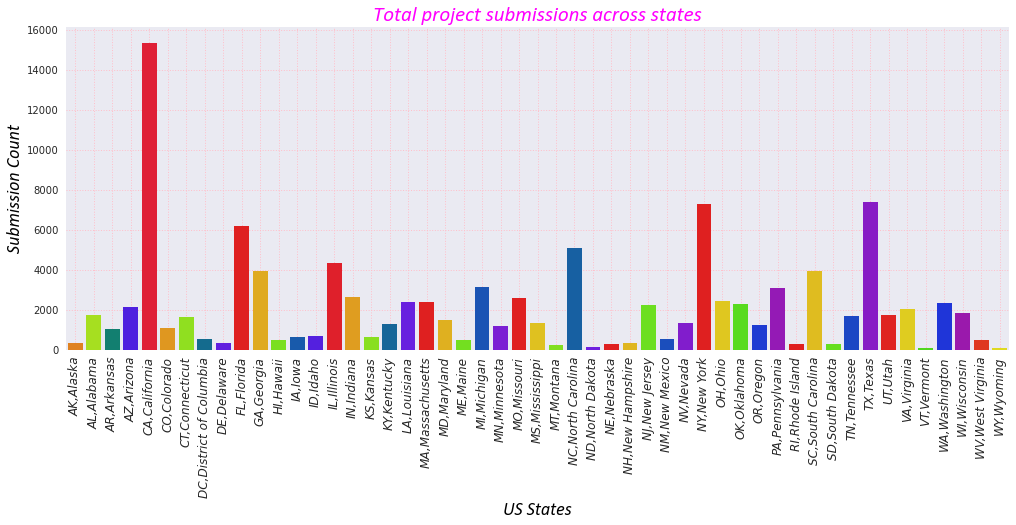

In [23]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(14,7))
    sns.barplot(x='state_codes_names',y='tot_subms',data=states_apprv_rejec[states_apprv_rejec['project_is_approved']==0],
                palette='prism')
    plt.xlabel("US States",fontdict=lbl_dict)
    plt.ylabel("Submission Count",fontdict=lbl_dict)
    plt.grid(linestyle=':',color='pink',which='major')
    plt.xticks(rotation=90,style='oblique',size=12)
    plt.title("Total project submissions across states",fontdict=ttl_dict)
    plt.tight_layout(pad=0.5,h_pad=0.3)

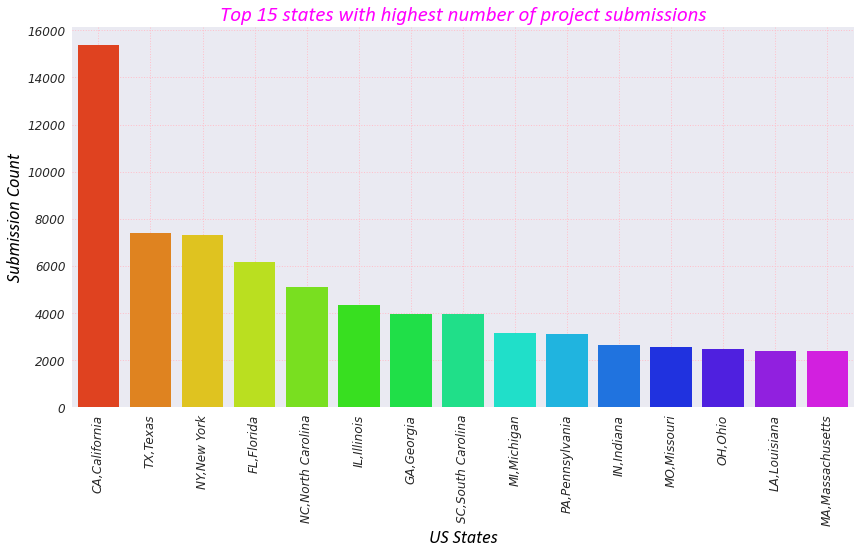

In [24]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(14,7))
    sns.barplot(x='state_codes_names',y='tot_subms',
                data=states_apprv_rejec[states_apprv_rejec['project_is_approved']==0].sort_values(by='tot_subms',ascending=False).iloc[0:15,:],
                palette='gist_rainbow')
    plt.xlabel("US States",fontdict=lbl_dict)
    plt.ylabel("Submission Count",fontdict=lbl_dict)
    plt.grid(linestyle=':',color='pink',which='major')
    plt.xticks(rotation=90,style='oblique',size=12)
    plt.yticks(style='oblique',size=12)
    plt.title("Top 15 states with highest number of project submissions",fontdict=ttl_dict)

In [25]:
print("*****Top 15 states with highest number of project submissions*****")
print(states_apprv_rejec[states_apprv_rejec['project_is_approved']==0].sort_values(by='tot_subms',ascending=False).iloc[0:15,[3,4]])

*****Top 15 states with highest number of project submissions*****
    state_codes_names  tot_subms
4       CA,California      15388
43           TX,Texas       7396
34        NY,New York       7318
9          FL,Florida       6185
27  NC,North Carolina       5091
14        IL,Illinois       4350
10         GA,Georgia       3963
40  SC,South Carolina       3936
22        MI,Michigan       3161
38    PA,Pennsylvania       3109
15         IN,Indiana       2620
24        MO,Missouri       2576
35            OH,Ohio       2467
18       LA,Louisiana       2394
19   MA,Massachusetts       2389


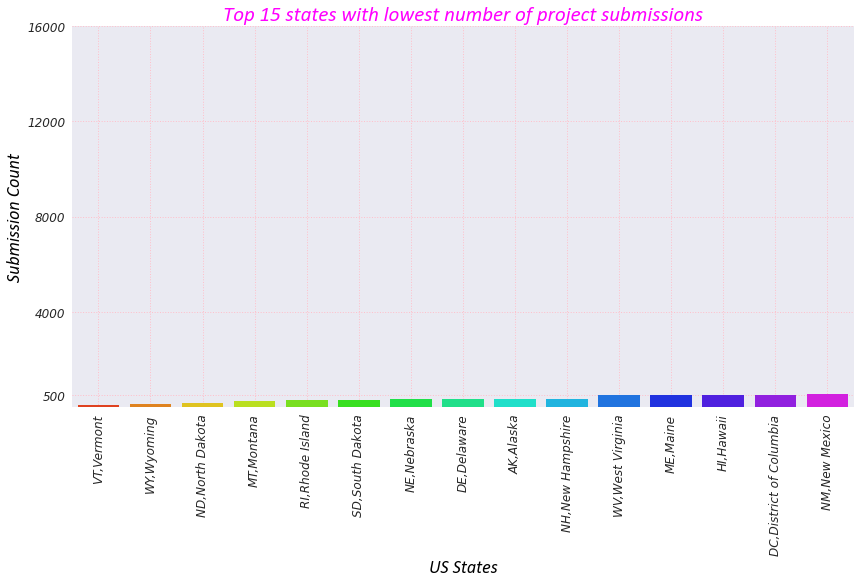

In [26]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(14,7))
    sns.barplot(x='state_codes_names',y='tot_subms',
                data=states_apprv_rejec[states_apprv_rejec['project_is_approved']==0].sort_values(by='tot_subms',ascending=True).iloc[0:15,:],
                palette='gist_rainbow')
    plt.xlabel("US States",fontdict=lbl_dict)
    plt.ylabel("Submission Count",fontdict=lbl_dict)
    plt.grid(linestyle=':',color='pink',which='major')
    plt.xticks(rotation=90,style='oblique',size=12)
    plt.title("Top 15 states with lowest number of project submissions",fontdict=ttl_dict)
    plt.yticks([500,4000,8000,12000,16000])
    plt.yticks(style='oblique',size=12)

In [27]:
print("*****Top 15 states with lowest number of project submissions*****")
print(states_apprv_rejec[states_apprv_rejec['project_is_approved']==0].sort_values(by='tot_subms',ascending=True).iloc[0:15,[3,4]])

*****Top 15 states with lowest number of project submissions*****
          state_codes_names  tot_subms
46               VT,Vermont         80
50               WY,Wyoming         98
28          ND,North Dakota        143
26               MT,Montana        245
39          RI,Rhode Island        285
41          SD,South Dakota        300
29              NE,Nebraska        309
8               DE,Delaware        343
0                 AK,Alaska        345
30         NH,New Hampshire        348
49         WV,West Virginia        503
21                 ME,Maine        505
11                HI,Hawaii        507
7   DC,District of Columbia        516
32            NM,New Mexico        557


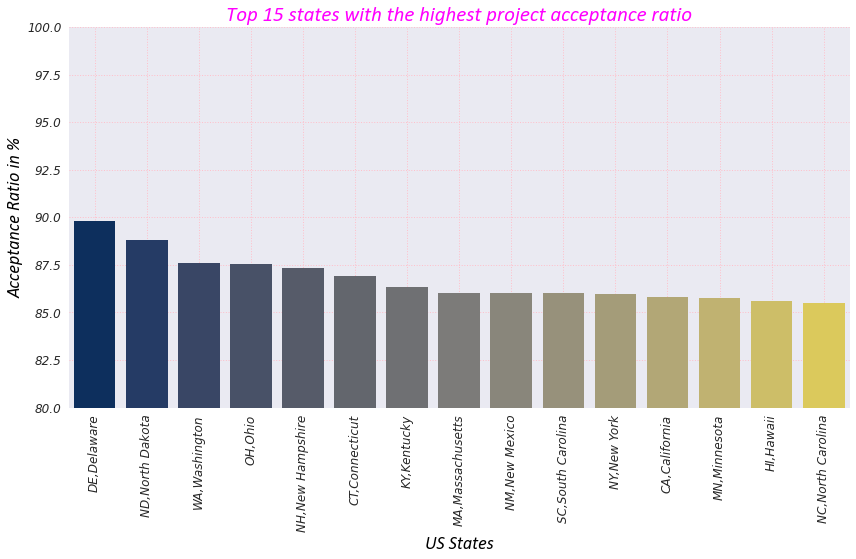

In [28]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(14,7))
    sns.barplot(x='state_codes_names',y='perc_subms',
                data=states_apprv_rejec[states_apprv_rejec['project_is_approved']==1].sort_values(by='perc_subms',ascending=False).iloc[0:15,:],
                palette='cividis')
    plt.xlabel("US States",fontdict=lbl_dict)
    plt.ylabel("Acceptance Ratio in %",fontdict=lbl_dict)
    plt.xticks(rotation=90,style='oblique',size=12)
    plt.yticks(style='oblique',size=12)
    plt.grid(linestyle=':',color='pink',which='major')
    plt.ylim(80,100)
    plt.title("Top 15 states with the highest project acceptance ratio",fontdict=ttl_dict)

In [29]:
print("*****Top 15 states with the highest project acceptance ratio*****")
print(states_apprv_rejec[states_apprv_rejec['project_is_approved']==1].sort_values(by='perc_subms',ascending=False).iloc[0:15,[3,-2]])

*****Top 15 states with the highest project acceptance ratio*****
    state_codes_names  perc_subms
59        DE,Delaware       89.80
79    ND,North Dakota       88.81
98      WA,Washington       87.62
86            OH,Ohio       87.52
81   NH,New Hampshire       87.36
57     CT,Connecticut       86.89
68        KY,Kentucky       86.35
70   MA,Massachusetts       86.02
83      NM,New Mexico       86.00
91  SC,South Carolina       86.00
85        NY,New York       85.97
55      CA,California       85.81
74       MN,Minnesota       85.76
62          HI,Hawaii       85.60
78  NC,North Carolina       85.50


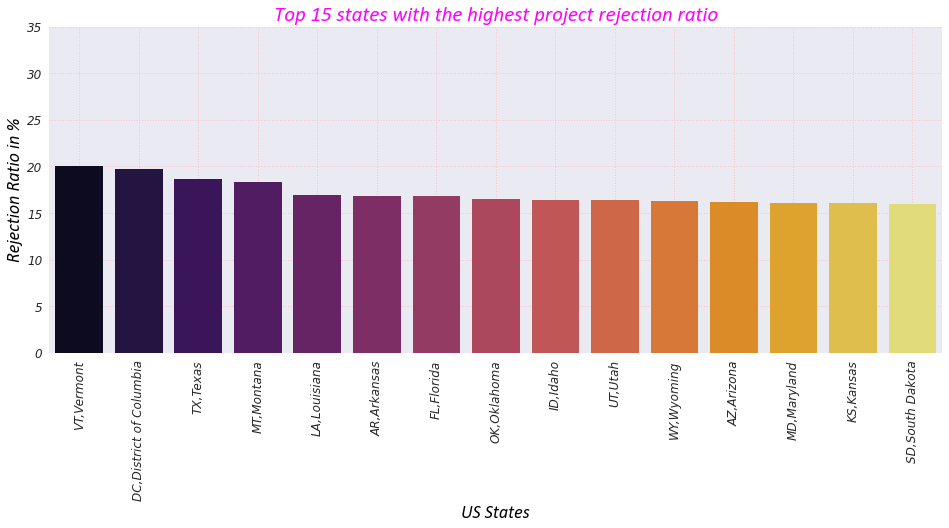

In [30]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(16,6))
    sns.barplot(x='state_codes_names',y='perc_subms',
                data=states_apprv_rejec[states_apprv_rejec['project_is_approved']==0].sort_values(by='perc_subms',ascending=False).iloc[0:15,:],
                palette='inferno')
    plt.xlabel("US States",fontdict=lbl_dict)
    plt.ylabel("Rejection Ratio in %",fontdict=lbl_dict)
    plt.xticks(rotation=90,style='oblique',size=12)
    plt.yticks(style='oblique',size=12)
    plt.grid(linestyle=':',color='pink',which='major')
    plt.ylim(0,35)
    plt.title("Top 15 states with the highest project rejection ratio",fontdict=ttl_dict)

In [31]:
print("*****Top 15 states with the highest project rejection ratio*****")
print(states_apprv_rejec[states_apprv_rejec['project_is_approved']==0].sort_values(by='perc_subms',ascending=False).iloc[0:15,[3,-2]])

*****Top 15 states with the highest project rejection ratio*****
          state_codes_names  perc_subms
46               VT,Vermont       20.00
7   DC,District of Columbia       19.77
43                 TX,Texas       18.69
26               MT,Montana       18.37
18             LA,Louisiana       16.88
2               AR,Arkansas       16.87
9                FL,Florida       16.83
36              OK,Oklahoma       16.52
13                 ID,Idaho       16.45
44                  UT,Utah       16.35
50               WY,Wyoming       16.33
3                AZ,Arizona       16.16
20              MD,Maryland       16.12
16                KS,Kansas       16.09
41          SD,South Dakota       16.00


#### **Data Analysis Functions**

In [132]:
def analysis_data_prep(df_obj,tgt_val,indp_val,trunc_flg):
    """
    Description: This function is created for performing the univariate data analysis results prep.
    
    Input parameters: It accepts below inputs:
        1. `df_obj`: Pandas DataFrame
                Dataframe containing the entire dataset.
        2. `tgt_val`: str
                Target class attribute name exists in df_obj will be used for grouping the data based on classes.
        3. `indp_val`: str
                Feature/Attribute name that exists in df_obj and needs to be analysed.
        4. `trunc_flg`: boolean
                This is a flag parameter used for limiting the data if many classes exists in independent variable.
    
    Return: It returns either of the pandas dataframe objects `tmp5` or `tmp`.
        `tmp5`: Returned if trunc_flg is True then 60 records of every target class is selected based on the independent variable categories.
                (30 from both top & bottom total submissions)
         else
        `tmp` is returned which contains data from all the feature .
    """
    tmp_df = df_obj.copy(deep=True)
    tmp_df.reset_index(inplace=True)
    
    # Calculating the total submissions in every feature class
    total_subms = tmp_df[indp_val].value_counts().to_dict()
    
    # Generating the multi-index to get the zero count as well if record doesn't exist in feature class 
    mul_idx = pd.MultiIndex.from_product([tmp_df[tgt_val].unique(),tmp_df[indp_val].unique()],names=[tgt_val,indp_val])
    tmp = pd.DataFrame(tmp_df.groupby([tgt_val,indp_val])['index'].count()).reindex(mul_idx, fill_value=0)\
    .reset_index().rename(columns={'index':'count'}).copy(deep=True)
    
    # Generating the total submissions column 
    tmp['tot_subms'] = tmp[indp_val].apply(lambda val: total_subms.get(val))
    
    # Generating the percentage submissions column
    tmp['perc_subms'] = tmp[['count','tot_subms']].apply(lambda row: np.round((row['count']/row['tot_subms'])*100.0,2),axis=1)
    
    # trunc_flg is used if feature variable contains numerous categories
    if trunc_flg:
        tmp1 = tmp[tmp[tgt_val]==0].sort_values(by='tot_subms',ascending=False).iloc[:30,:].reset_index(drop=True)
        tmp2 = tmp[tmp[tgt_val]==0].sort_values(by='tot_subms',ascending=True).iloc[:30,:].reset_index(drop=True)
        tmp3 = tmp[tmp[tgt_val]==1].sort_values(by='tot_subms',ascending=False).iloc[:30,:].reset_index(drop=True)
        tmp4 = tmp[tmp[tgt_val]==1].sort_values(by='tot_subms',ascending=True).iloc[:30,:].reset_index(drop=True)
        tmp5 = pd.concat([tmp1,tmp2,tmp3,tmp4],axis=0).reset_index(drop=True)
        del tmp_df
        return tmp5
    else:
        del tmp_df
        return tmp
    
def univariate_analysis(df_obj,tgt_val,indp_val,xlabel,ylabel,t_flg=False):
    """
    Description: This function is created for plotting the graphs.
    
    Input parameters: It accepts below inputs:
        1. `df_obj`: Pandas DataFrame
                Dataframe containing the entire dataset.
        2. `tgt_val`: str
                Target class attribute name exists in df_obj will be used for grouping the data based on classes.
        3. `indp_val`: str
                Feature/Attribute name that exists in df_obj and needs to be analysed.
        4. `xlabel`: str
                X-axis label used in plotting.
        5. `ylabel`: str
                Y-axis label used in plotting.
        6. `t_flg`: boolean
                This is a flag parameter used for limiting the data if many classes exists in independent variable.
    
    Return: None
    """
    # Calling the analysis data prep function
    df = analysis_data_prep(df_obj,tgt_val,indp_val,t_flg)
    
    # Limiting the features classes for plotting
    unique_categories = int(df[df[tgt_val]==0][indp_val].nunique())
    if unique_categories > 20:
        thresh_rec = 16
    else:
        thresh_rec = unique_categories
        
    ## Plot-1 :: Displaying "Highest number of project submissions"
    with plt.style.context('seaborn'):
        plt.figure(figsize=(13,7))
        sns.barplot(x=indp_val,y='tot_subms',data=df[df[tgt_val]==0].sort_values(by='tot_subms',ascending=False),palette='gist_rainbow')
        plt.xlabel(xlabel,fontdict=lbl_dict)
        plt.ylabel(ylabel,fontdict=lbl_dict)
        plt.grid(linestyle=':',color='pink',which='major')
        plt.xticks(rotation=90,style='oblique',size=12)
        plt.yticks(style='oblique',size=12)
        plt.title("Highest number of project submissions",fontdict=ttl_dict)
        plt.minorticks_on()
        plt.tight_layout(pad=0.5,h_pad=0.3)
    plt.show()
    
    #### 1.1 :: Printing outcome values as a dataframe
    print('\n')
    print("*****Highest number of project submissions*****")
    print(df[df[tgt_val]==0].sort_values(by='tot_subms',ascending=False).reset_index(drop=True).iloc[:thresh_rec,:][[indp_val,'tot_subms']].
          rename(columns={'tot_subms':'Total_Submissions'}))
    print('\n')
    
    ## Plot-2 :: Displaying the data in a stacked bar plot
    x_index = np.arange(df[df[tgt_val]==0].shape[0])  
    with plt.style.context('seaborn-bright'):
        plt.figure(figsize=(14,12))
        total = plt.barh(x_index, df[df[tgt_val]==0]['tot_subms'].values)
        approved = plt.barh(x_index, df[df[tgt_val]==1]['count'].values)
        plt.xlabel(ylabel,fontdict=lbl_dict)
        plt.ylabel(xlabel,fontdict=lbl_dict)
        plt.title('% of projects aproved for funding',fontdict=ttl_dict)
        plt.yticks(x_index,list(df[df[tgt_val]==0][indp_val].values),rotation=0,style='oblique',size=12)
        plt.xticks(style='oblique',size=12)
        plt.legend((total[0], approved[0]), ('Total', 'Approved'))
        plt.minorticks_on()
        plt.tight_layout(pad=0.5,h_pad=0.3)
    plt.show()
    print('\n')
    
    ## Plot-3 :: Displaying "Highest project acceptance ratio"
    with plt.style.context('seaborn'):
        plt.figure(figsize=(13,7))
        sns.barplot(x=indp_val,y='perc_subms',data=df[df[tgt_val]==1].sort_values(by='perc_subms',ascending=False),palette='cividis')
        plt.xlabel(xlabel,fontdict=lbl_dict)
        plt.ylabel("Approved %",fontdict=lbl_dict)
        plt.xticks(rotation=90,style='oblique',size=12)
        plt.yticks(style='oblique',size=12)
        plt.grid(linestyle=':',color='pink',which='major')
        plt.ylim(60,100)
        plt.title("Highest project acceptance ratio",fontdict=ttl_dict)
        plt.minorticks_on()
        plt.tight_layout(pad=0.5,h_pad=0.3)
    plt.show()
    
    #### 3.1 :: Printing outcome values as a dataframe
    print('\n')
    print("*****Highest project acceptance ratio*****")
    print(df[df[tgt_val]==1].sort_values(by='perc_subms',ascending=False).reset_index(drop=True).
          iloc[:thresh_rec,:][[indp_val,'count','tot_subms','perc_subms']].\
          rename(columns={'count':'Apprv_Submissions','tot_subms':'Total_Submissions','perc_subms':'Apprv_%'}))
    print('\n')
    
    ## Plot-4 :: Displaying "Highest project rejection ratio"
    """Although the plot-3 is an opposite of plot-4 and kind of portray the same info with a different manner, 
       but its always better to plot it explicitly"""
    with plt.style.context('seaborn'):
        plt.figure(figsize=(13,7))
        sns.barplot(x=indp_val,y='perc_subms',data=df[df[tgt_val]==0].sort_values(by='perc_subms',ascending=False),palette='winter')
        plt.xlabel(xlabel,fontdict=lbl_dict)
        plt.ylabel("Rejection %",fontdict=lbl_dict)
        plt.xticks(rotation=90,style='oblique',size=12)
        plt.yticks(style='oblique',size=12)
        plt.grid(linestyle=':',color='pink',which='major')
        plt.ylim(0,50)
        plt.title("Highest project rejection ratio",fontdict=ttl_dict)
        plt.minorticks_on()
        plt.tight_layout(pad=0.5,h_pad=0.3)
    plt.show()
    
    #### 4.1 ::  Printing outcome values as a dataframe
    print('\n')
    print("*****Highest project rejection ratio*****")
    print(df[df[tgt_val]==0].sort_values(by='perc_subms',ascending=False).reset_index(drop=True).
          iloc[:thresh_rec,:][[indp_val,'count','tot_subms','perc_subms']].
          rename(columns={'count':'Reject_Submissions','tot_subms':'Total_Submissions','perc_subms':'Reject_%'}))

### **Attribute-2 :: `Teacher Prefix`**

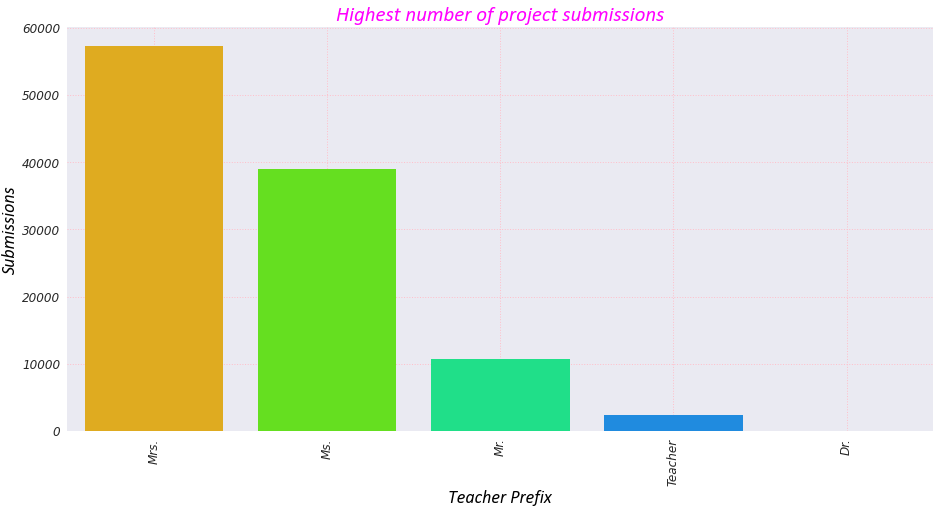



*****Highest number of project submissions*****
  teacher_prefix  Total_Submissions
0           Mrs.            57269.0
1            Ms.            38955.0
2            Mr.            10648.0
3        Teacher             2360.0
4            Dr.               13.0




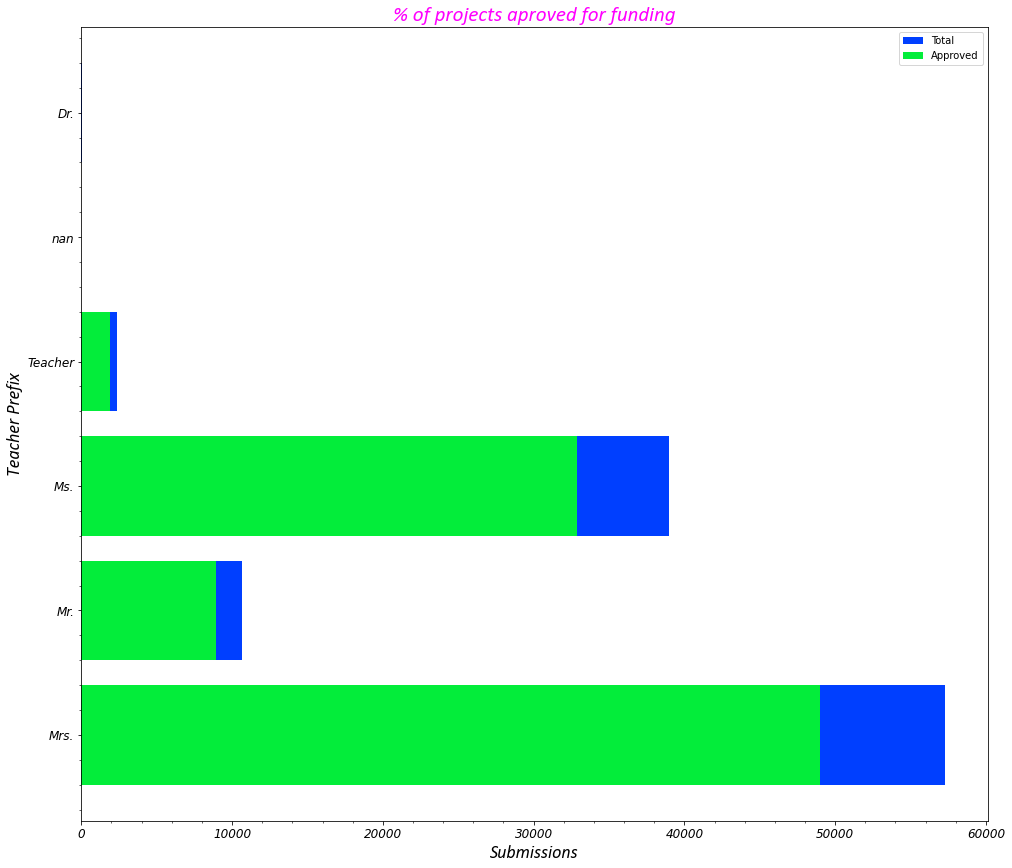

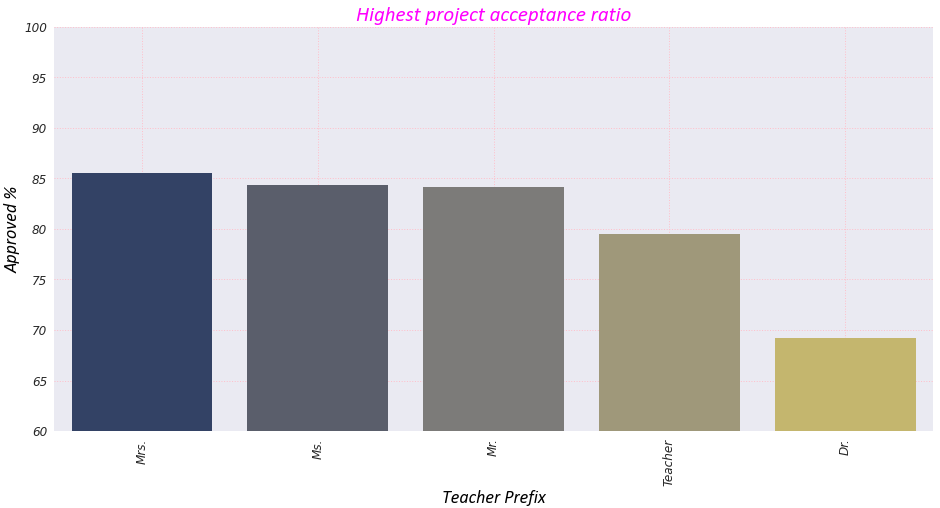



*****Highest project acceptance ratio*****
  teacher_prefix  Apprv_Submissions  Total_Submissions  Apprv_%
0           Mrs.              48997            57269.0    85.56
1            Ms.              32860            38955.0    84.35
2            Mr.               8960            10648.0    84.15
3        Teacher               1877             2360.0    79.53
4            Dr.                  9               13.0    69.23




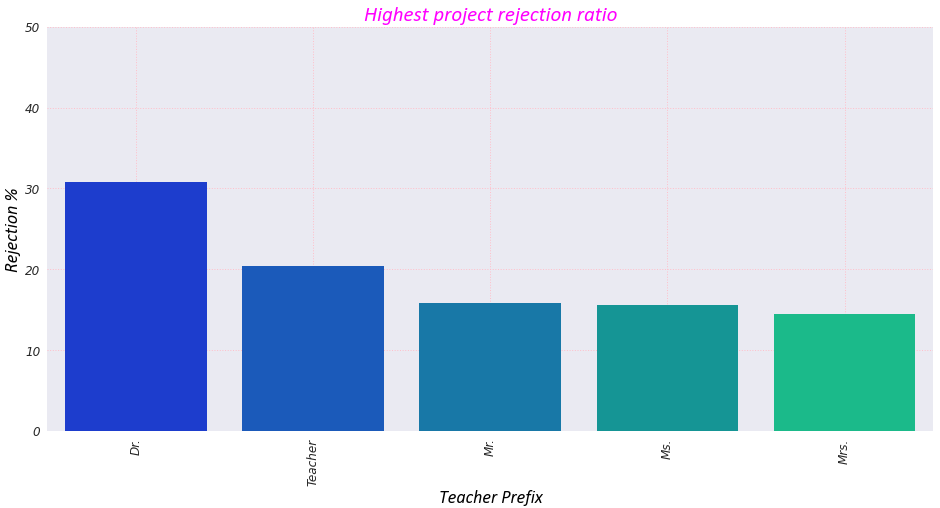



*****Highest project rejection ratio*****
  teacher_prefix  Reject_Submissions  Total_Submissions  Reject_%
0            Dr.                   4               13.0     30.77
1        Teacher                 483             2360.0     20.47
2            Mr.                1688            10648.0     15.85
3            Ms.                6095            38955.0     15.65
4           Mrs.                8272            57269.0     14.44


In [33]:
univariate_analysis(dc_train_df,'project_is_approved','teacher_prefix','Teacher Prefix','Submissions')

### **Attribute-3 :: `Project Grade Category`**

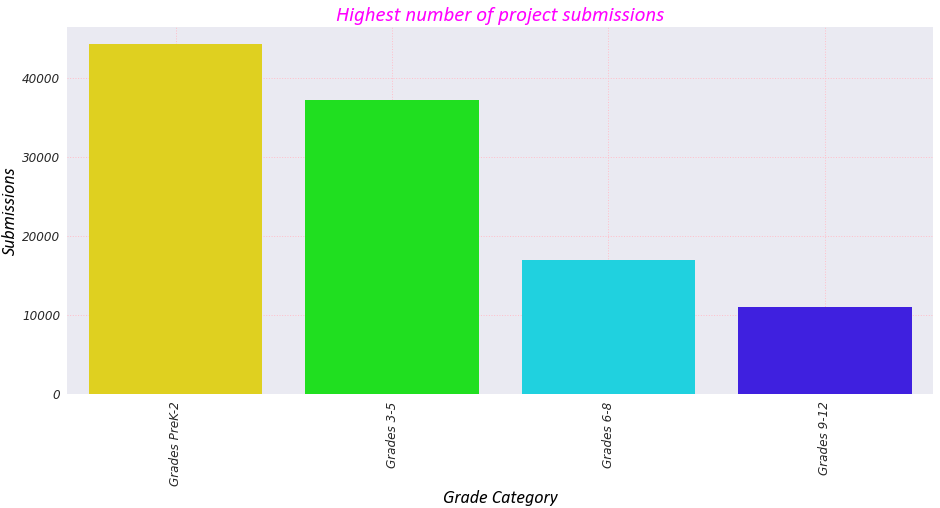



*****Highest number of project submissions*****
  project_grade_category  Total_Submissions
0          Grades PreK-2              44225
1             Grades 3-5              37137
2             Grades 6-8              16923
3            Grades 9-12              10963




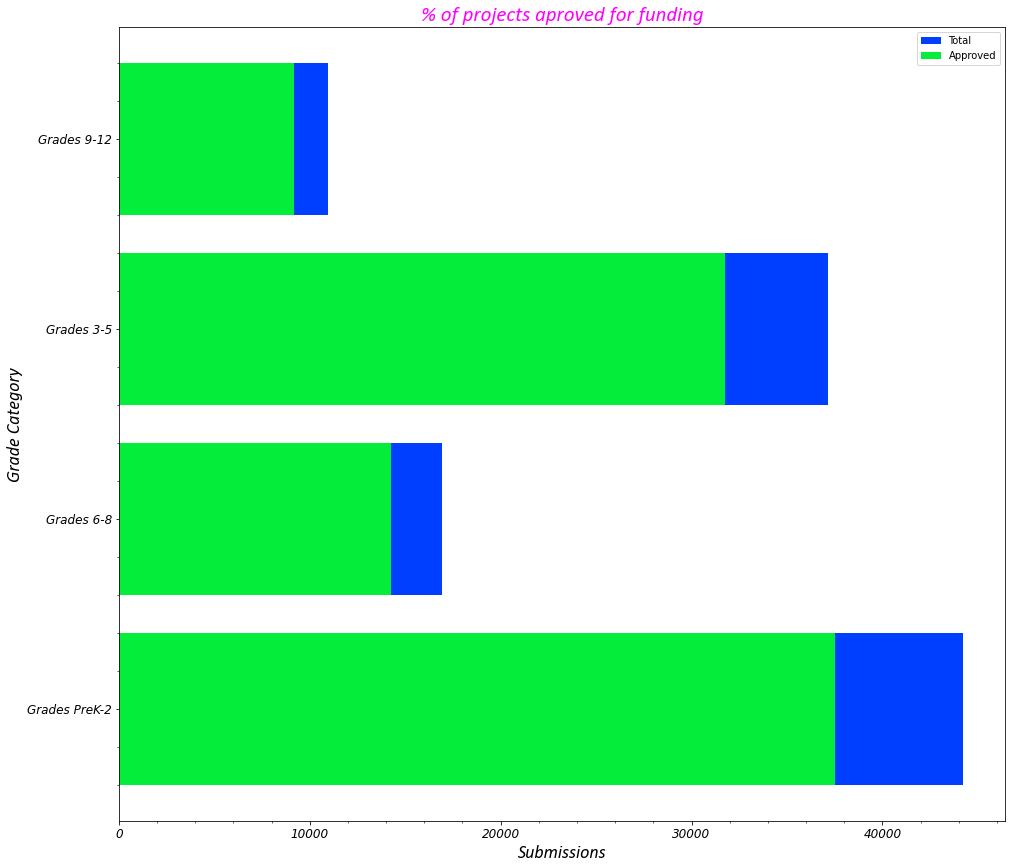

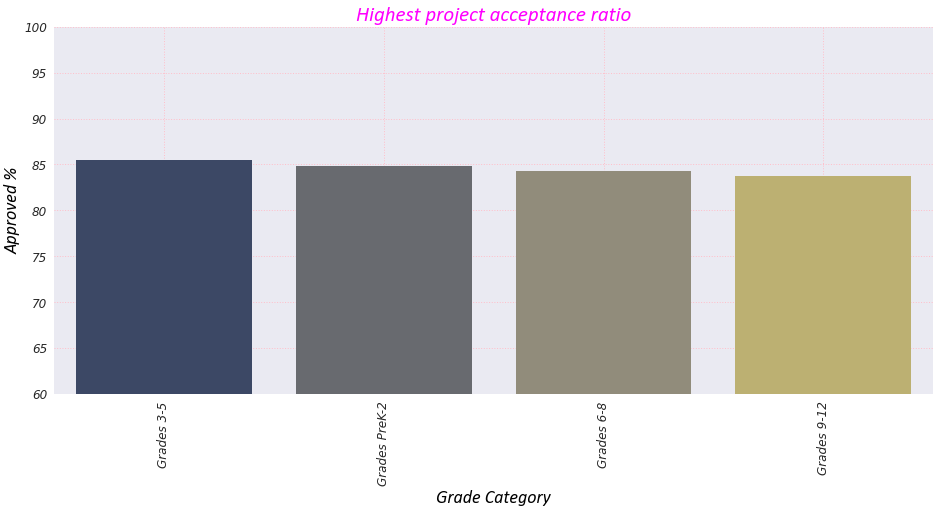



*****Highest project acceptance ratio*****
  project_grade_category  Apprv_Submissions  Total_Submissions  Apprv_%
0             Grades 3-5              31729              37137    85.44
1          Grades PreK-2              37536              44225    84.88
2             Grades 6-8              14258              16923    84.25
3            Grades 9-12               9183              10963    83.76




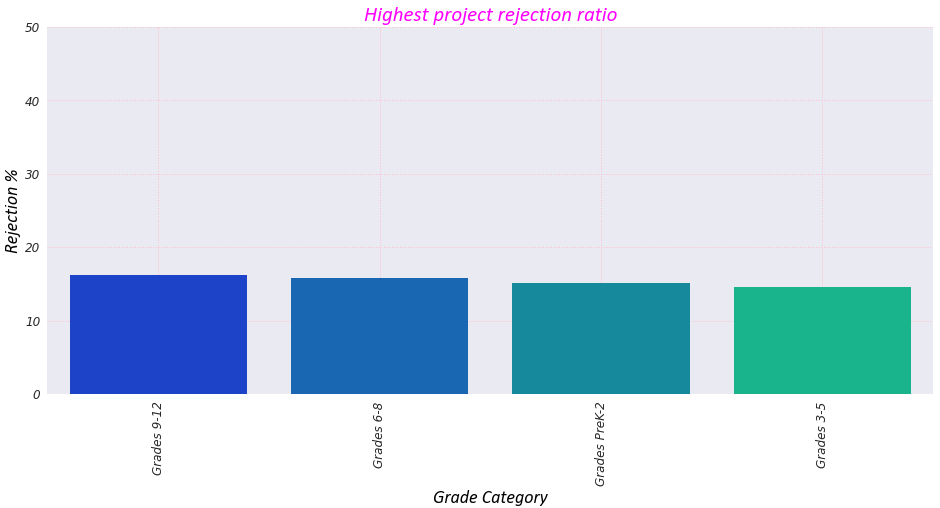



*****Highest project rejection ratio*****
  project_grade_category  Reject_Submissions  Total_Submissions  Reject_%
0            Grades 9-12                1780              10963     16.24
1             Grades 6-8                2665              16923     15.75
2          Grades PreK-2                6689              44225     15.12
3             Grades 3-5                5408              37137     14.56


In [34]:
univariate_analysis(dc_train_df,'project_is_approved','project_grade_category','Grade Category','Submissions')

### **Attribute-4 :: `Project Subject Category`**

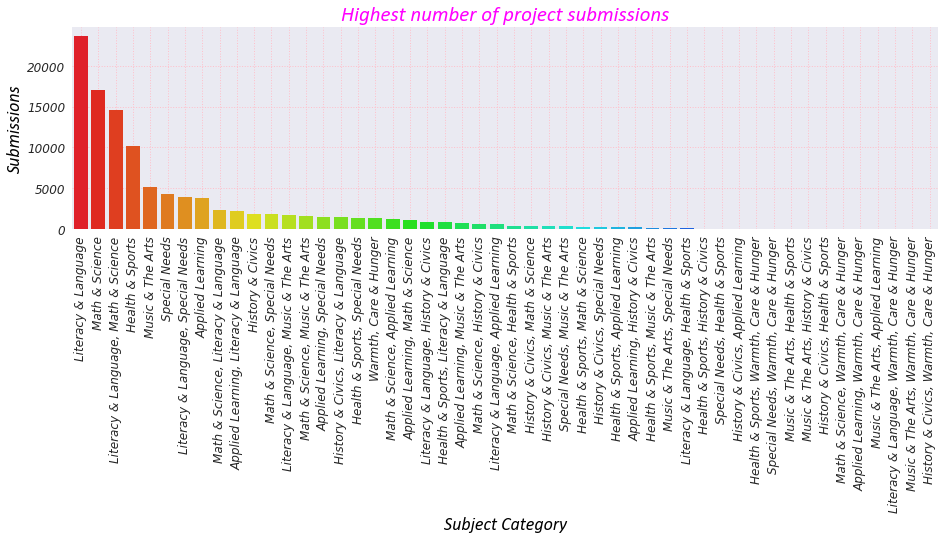



*****Highest number of project submissions*****
               project_subject_categories  Total_Submissions
0                     Literacy & Language              23655
1                          Math & Science              17072
2     Literacy & Language, Math & Science              14636
3                         Health & Sports              10177
4                        Music & The Arts               5180
5                           Special Needs               4226
6      Literacy & Language, Special Needs               3961
7                        Applied Learning               3771
8     Math & Science, Literacy & Language               2289
9   Applied Learning, Literacy & Language               2191
10                       History & Civics               1851
11          Math & Science, Special Needs               1840
12  Literacy & Language, Music & The Arts               1757
13       Math & Science, Music & The Arts               1642
14        Applied Learning, Special

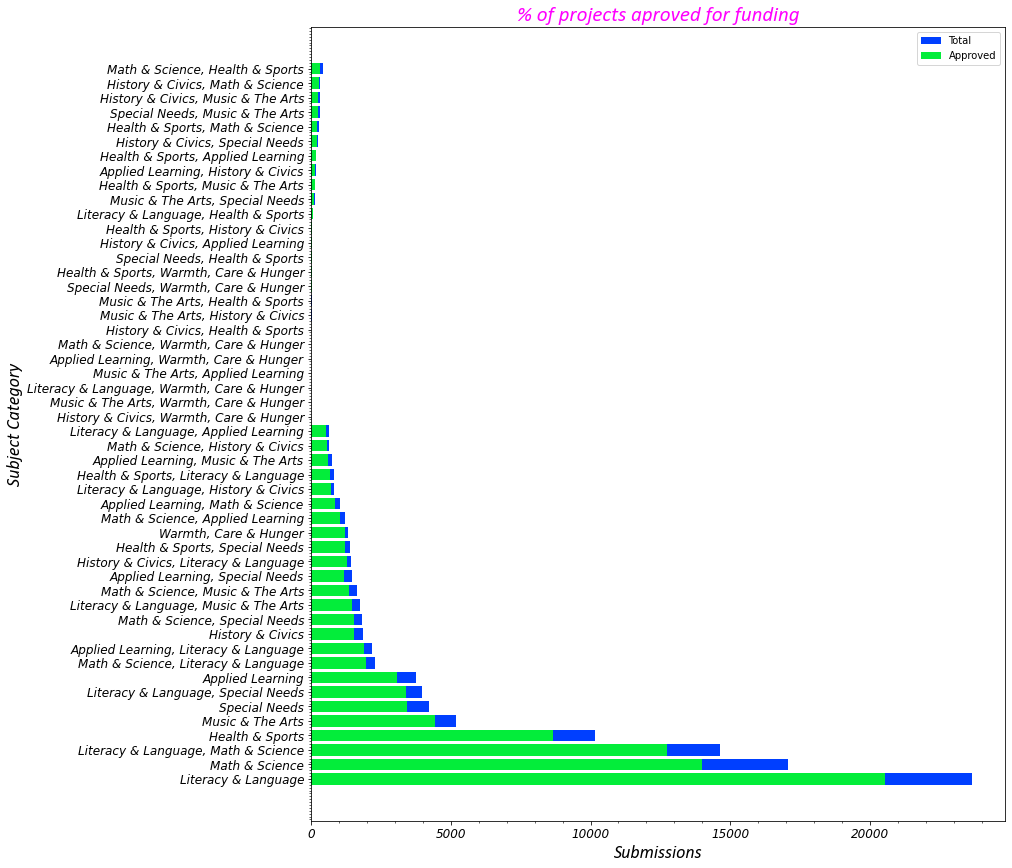

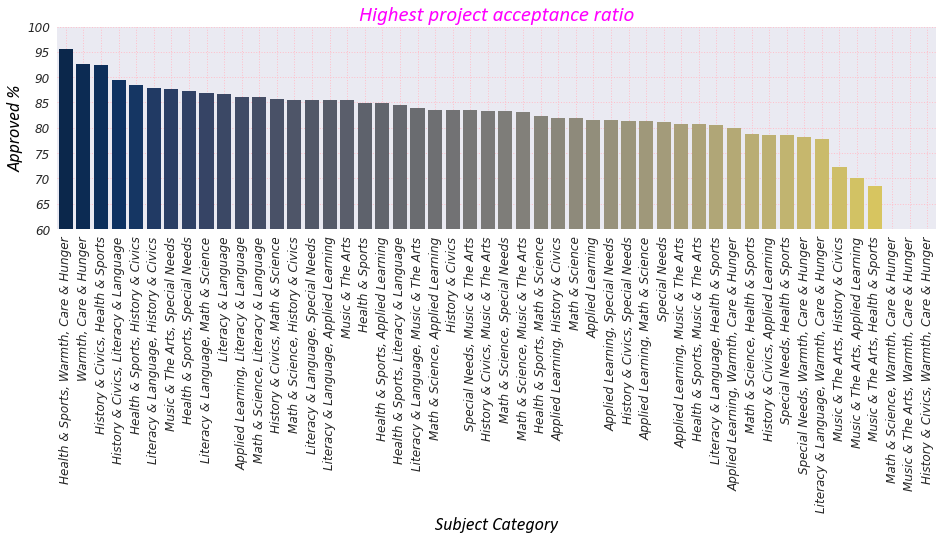



*****Highest project acceptance ratio*****
                project_subject_categories  Apprv_Submissions  \
0   Health & Sports, Warmth, Care & Hunger                 22   
1                    Warmth, Care & Hunger               1212   
2        History & Civics, Health & Sports                 12   
3    History & Civics, Literacy & Language               1271   
4        Health & Sports, History & Civics                 38   
5    Literacy & Language, History & Civics                710   
6          Music & The Arts, Special Needs                121   
7           Health & Sports, Special Needs               1215   
8      Literacy & Language, Math & Science              12725   
9                      Literacy & Language              20520   
10   Applied Learning, Literacy & Language               1887   
11     Math & Science, Literacy & Language               1968   
12        History & Civics, Math & Science                276   
13        Math & Science, History & Civics   

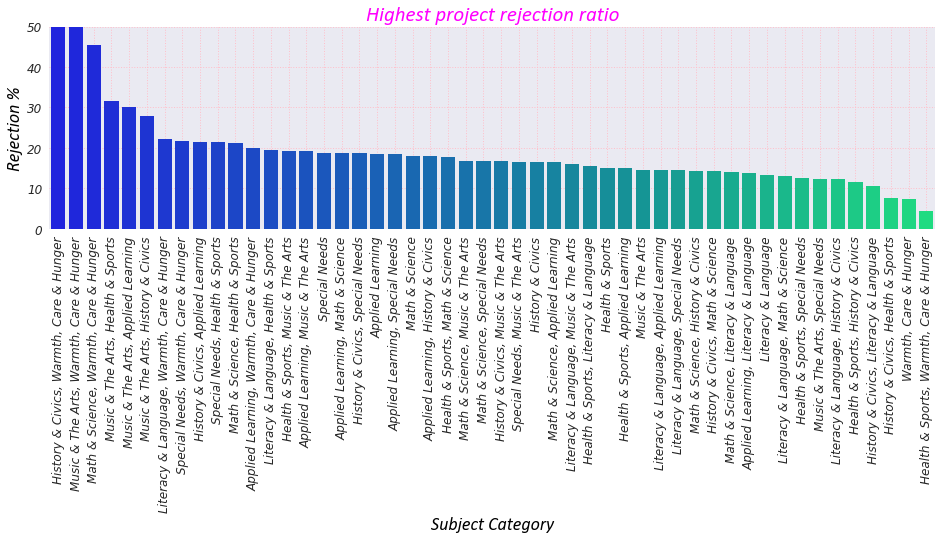



*****Highest project rejection ratio*****
                    project_subject_categories  Reject_Submissions  \
0      History & Civics, Warmth, Care & Hunger                   1   
1      Music & The Arts, Warmth, Care & Hunger                   1   
2        Math & Science, Warmth, Care & Hunger                   5   
3            Music & The Arts, Health & Sports                   6   
4           Music & The Arts, Applied Learning                   3   
5           Music & The Arts, History & Civics                   5   
6   Literacy & Language, Warmth, Care & Hunger                   2   
7         Special Needs, Warmth, Care & Hunger                   5   
8           History & Civics, Applied Learning                   9   
9               Special Needs, Health & Sports                   9   
10             Math & Science, Health & Sports                  88   
11     Applied Learning, Warmth, Care & Hunger                   2   
12        Literacy & Language, Health & Sports

In [35]:
univariate_analysis(dc_train_df,'project_is_approved','project_subject_categories','Subject Category','Submissions',t_flg=True)

### **Attribute-5 :: `Project Subject Sub-Category`**

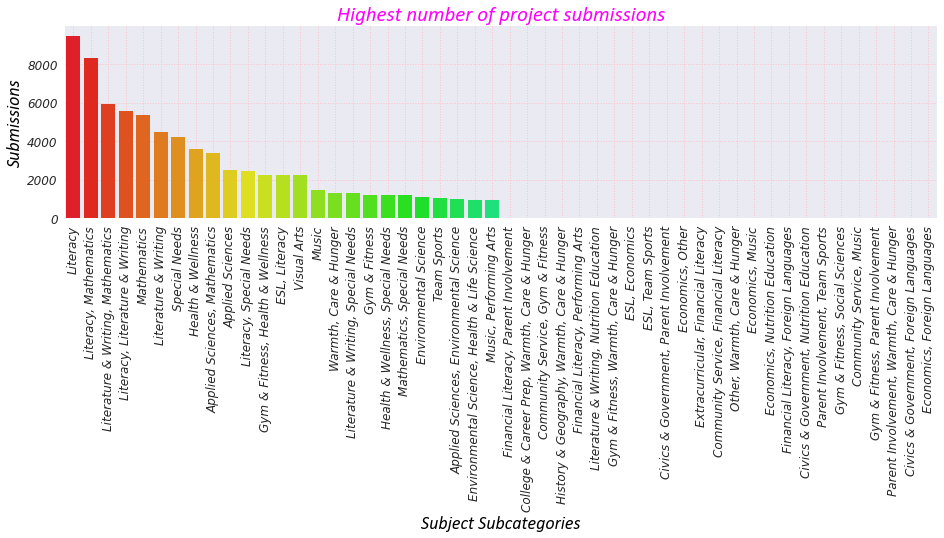



*****Highest number of project submissions*****
        project_subject_subcategories  Total_Submissions
0                            Literacy               9486
1               Literacy, Mathematics               8325
2   Literature & Writing, Mathematics               5923
3      Literacy, Literature & Writing               5571
4                         Mathematics               5379
5                Literature & Writing               4501
6                       Special Needs               4226
7                   Health & Wellness               3583
8       Applied Sciences, Mathematics               3399
9                    Applied Sciences               2492
10            Literacy, Special Needs               2440
11   Gym & Fitness, Health & Wellness               2264
12                      ESL, Literacy               2234
13                        Visual Arts               2217
14                              Music               1472
15              Warmth, Care & Hunger 

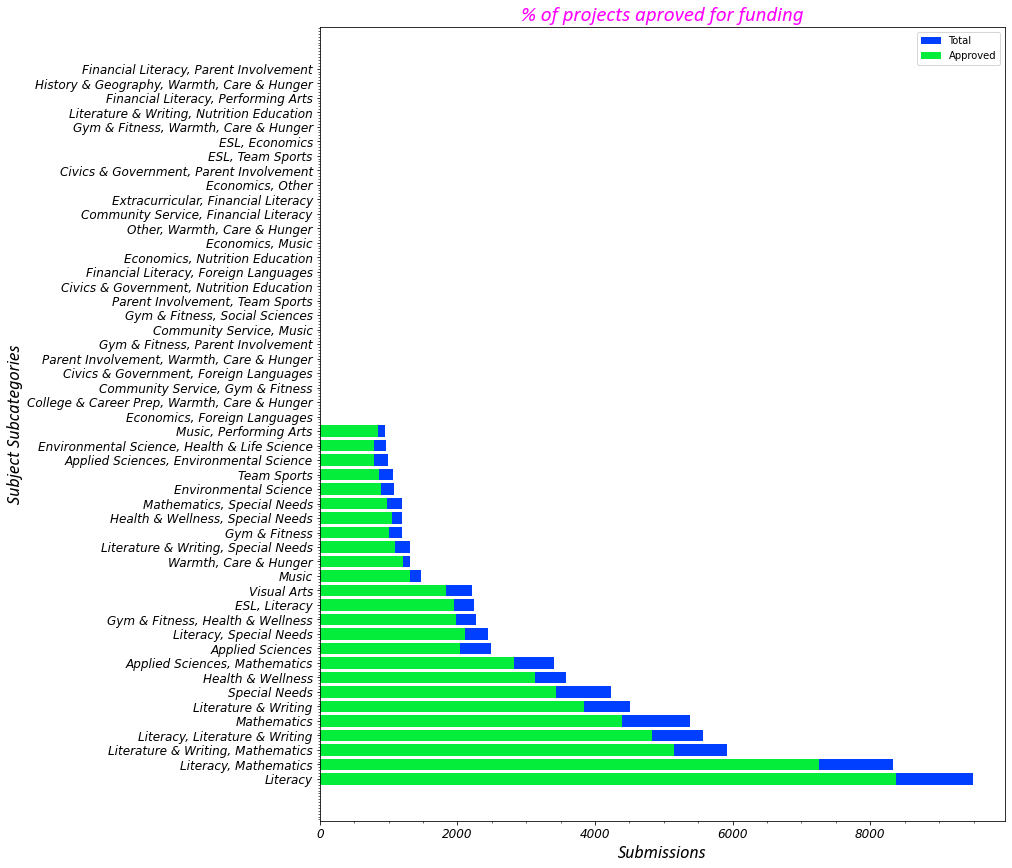

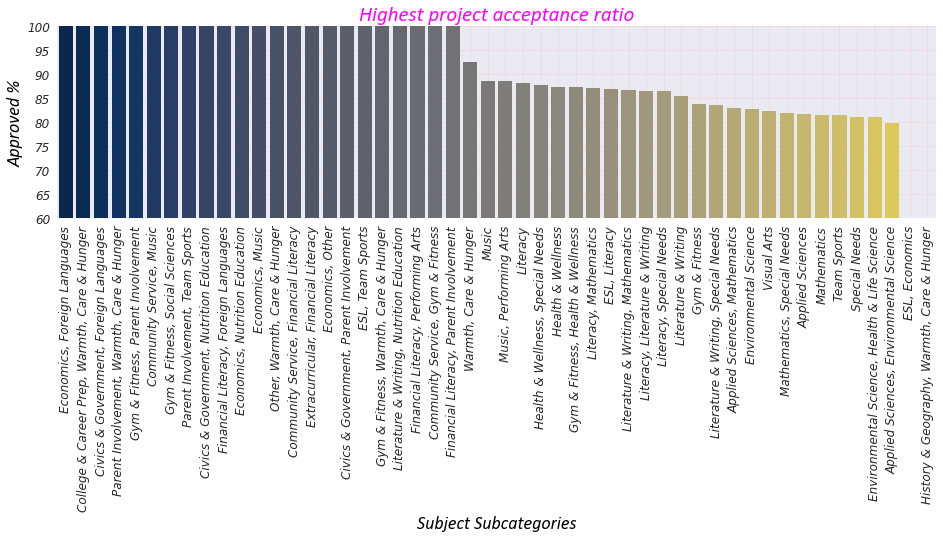



*****Highest project acceptance ratio*****
                   project_subject_subcategories  Apprv_Submissions  \
0                   Economics, Foreign Languages                  1   
1   College & Career Prep, Warmth, Care & Hunger                  1   
2         Civics & Government, Foreign Languages                  1   
3      Parent Involvement, Warmth, Care & Hunger                  1   
4              Gym & Fitness, Parent Involvement                  1   
5                       Community Service, Music                  1   
6                 Gym & Fitness, Social Sciences                  1   
7                Parent Involvement, Team Sports                  1   
8       Civics & Government, Nutrition Education                  1   
9          Financial Literacy, Foreign Languages                  1   
10                Economics, Nutrition Education                  1   
11                              Economics, Music                  1   
12                  Other, Warmt

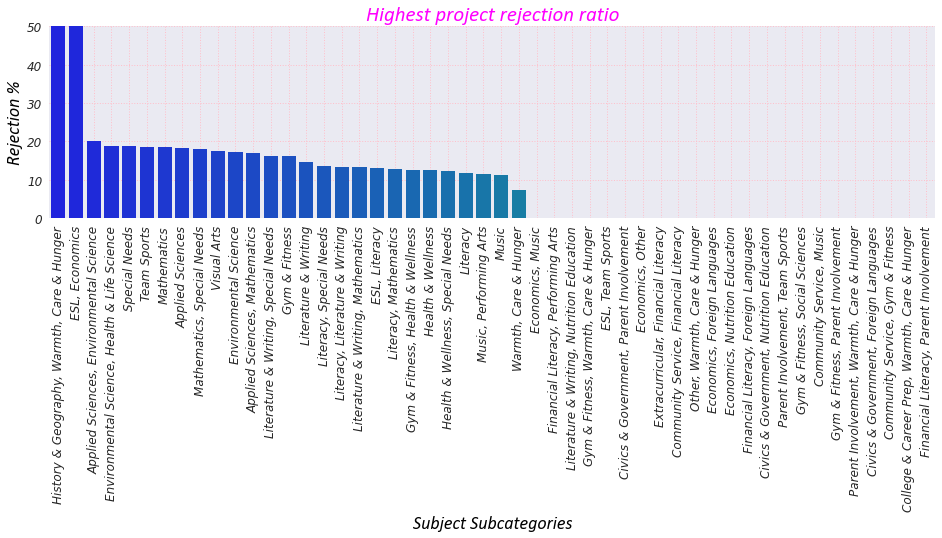



*****Highest project rejection ratio*****
                   project_subject_subcategories  Reject_Submissions  \
0     History & Geography, Warmth, Care & Hunger                   1   
1                                 ESL, Economics                   1   
2        Applied Sciences, Environmental Science                 199   
3   Environmental Science, Health & Life Science                 182   
4                                  Special Needs                 795   
5                                    Team Sports                 197   
6                                    Mathematics                 994   
7                               Applied Sciences                 454   
8                     Mathematics, Special Needs                 215   
9                                    Visual Arts                 390   
10                         Environmental Science                 185   
11                 Applied Sciences, Mathematics                 575   
12           Literat

In [36]:
univariate_analysis(dc_train_df,'project_is_approved','project_subject_subcategories','Subject Subcategories','Submissions',t_flg=True)

### **Attribute-6 :: `Teacher's number of previously posted projects`**

In [120]:
teacher_prev_projs = pd.DataFrame(dc_train_df.groupby(['project_is_approved','teacher_number_of_previously_posted_projects'])['id'].
                                  count()).reset_index().rename(columns={'id':'Submissions'})

In [121]:
def feat_buckets(val):
    """
    Description: This function is created for segregating the features values in buckets.
    
    Input: It accepts only one parameter:
        1. `val`: int
            Feature value used for allocating its bucket.
            
    Return: Bucket belongs to feature value."""
    
    if val >=0 and val <=50:
        return '0-50'
    elif val >=51 and val <=100:
        return '51-100'
    elif val >=101 and val <=150:
        return '101-150'
    elif val >=151 and val <=200:
        return '151-200'
    elif val >=201 and val <=250:
        return '201-250'
    elif val >=251 and val <=300:
        return '251-300'
    elif val >=301 and val <=350:
        return '301-350'
    elif val >=351 and val <=400:
        return '351-400'
    elif val >=401 and val <=451:
        return '401-451'

In [122]:
teacher_prev_projs['prev_proj_buckets'] = teacher_prev_projs['teacher_number_of_previously_posted_projects'].\
                                                apply(lambda prev_proj: feat_buckets(prev_proj))

In [123]:
mul_index = pd.MultiIndex.from_product([teacher_prev_projs['project_is_approved'].unique(),teacher_prev_projs['prev_proj_buckets'].unique()],
                                       names=['project_is_approved','prev_proj_buckets'])

In [124]:
teacher_prev_projs_bkts = teacher_prev_projs.groupby(['project_is_approved','prev_proj_buckets'])['Submissions'].sum().\
                                                    reindex(mul_index, fill_value=0).reset_index().rename(columns={'index':'count'})

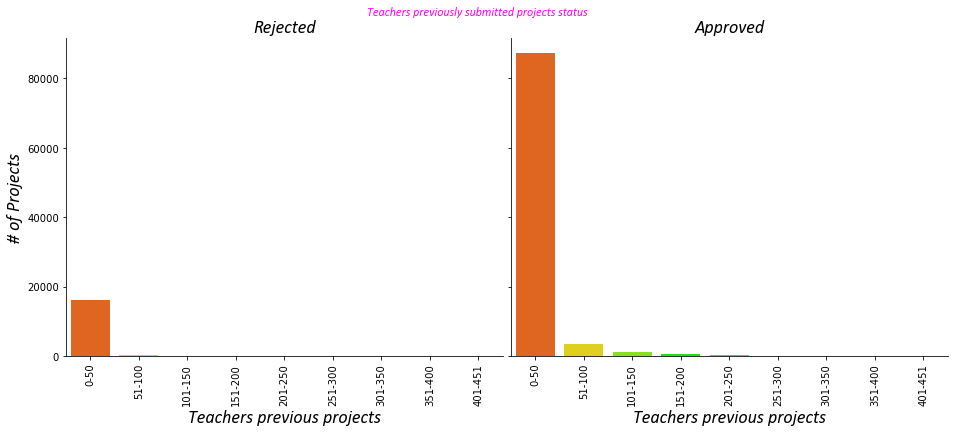

In [127]:
prev_projs = sns.catplot(data=teacher_prev_projs_bkts,x='prev_proj_buckets',y='Submissions',col='project_is_approved',
                         kind='bar',orient='v',palette='gist_rainbow',aspect=1.1,height=6)
prev_projs.set_xticklabels(rotation=90)
axes = prev_projs.axes.flatten()
axes[0].set_title("Rejected",fontdict=lbl_dict)
axes[0].set_xlabel("Teachers previous projects",fontdict=lbl_dict)
axes[0].set_ylabel("# of Projects",fontdict=lbl_dict)
axes[1].set_title("Approved",fontdict=lbl_dict)
axes[1].set_xlabel("Teachers previous projects",fontdict=lbl_dict)
axes[1].set_ylabel("",fontdict=lbl_dict)
prev_projs.fig.suptitle("Teachers previously submitted projects status",fontdict=ttl_dict)
plt.tight_layout(pad=0.5,h_pad=0.3)
plt.show()

In [100]:
teacher_prev_projs

project_is_approved prev_proj_buckets  Submissions
0                     0              0-50        16138
1                     0            51-100          263
2                     0           101-150           97
3                     0           151-200           33
4                     0           201-250            6
5                     0           251-300            2
6                     0           301-350            3
7                     0           351-400            0
8                     0           401-451            0
9                     1              0-50        87364
10                    1            51-100         3302
11                    1           101-150         1177
12                    1           151-200          472
13                    1           201-250          156
14                    1           251-300          101
15                    1           301-350           79
16                    1           351-400           36
17                    1           401-451           19

### **Attribute-7 :: `Project Resource Summary`**

In [139]:
a = dc_train_df[['project_resource_summary']].iloc[14:16]

In [141]:
a['words'] = a['project_resource_summary'].apply(lambda val: val.split(" "))

In [155]:
def check_num(words_list):
    contain_num = []
    for word in words_list:
        kk = re.findall('[0-9]',word)
        contain_num.append(kk)
    print(contain_num)

In [156]:
a['words'].apply(lambda val: check_num(val))

[[], [], [], ['5'], [], [], [], [], [], [], []]
[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


14    None
15    None
Name: words, dtype: object

In [142]:
a

project_resource_summary  \
14  My students need 5 tablets for our classroom t...   
15  My students need activities to play during rec...   

                                                words  
14  [My, students, need, 5, tablets, for, our, cla...  
15  [My, students, need, activities, to, play, dur...

In [134]:
dc_train_df['project_resource_summary'].head(50)

0     My students need opportunities to practice beg...
1     My students need a projector to help with view...
2     My students need shine guards, athletic socks,...
3     My students need to engage in Reading and Math...
4     My students need hands on practice in mathemat...
5     My students need movement to be successful. Be...
6     My students need some dependable laptops for d...
7     My students need ipads to help them access a w...
8     My students need three devices and three manag...
9     My students need great books to use during Ind...
10    My students need books by their favorite autho...
11    My students need paper, three chromebooks, and...
12    My students need 3D and 4D life science activi...
13    My students need access to technology that wil...
14    My students need 5 tablets for our classroom t...
15    My students need activities to play during rec...
16    My students need 2 LeapPad that will engage th...
17    My students need Chromebooks to publish wr

In [40]:
dc_train_df.head(4)

id                        teacher_id teacher_prefix school_state  \
0  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.           IN   
1  p258326  897464ce9ddc600bced1151f324dd63a            Mr.           FL   
2  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.           AZ   
3  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.           KY   

  project_submitted_datetime project_grade_category  \
0        2016-12-05 13:43:57          Grades PreK-2   
1        2016-10-25 09:22:10             Grades 6-8   
2        2016-08-31 12:03:56             Grades 6-8   
3        2016-10-06 21:16:17          Grades PreK-2   

            project_subject_categories     project_subject_subcategories  \
0                  Literacy & Language                     ESL, Literacy   
1    History & Civics, Health & Sports  Civics & Government, Team Sports   
2                      Health & Sports    Health & Wellness, Team Sports   
3  Literacy & Language, Math & Science             Literacy, Mathematics   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   
3  I work at a unique school filled with both ESL...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   
2  The students on the campus come to school know...             NaN   
3  My students live in high poverty conditions wi...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   
3             NaN  My students need to engage in Reading and Math...   

   teacher_number_of_previously_posted_projects  project_is_approved  
0                                             0                    0  
1                                             7                    1  
2                                             1                    0  
3                                             4                    1